In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from tensorflow.keras.models import Model 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import seaborn as sns

In [2]:
df = pd.read_csv("/content/allrecipe_0-1000_merge.csv")

In [3]:
df.head()

,ingredients,url,partition,title,id,instructions,Unnamed: 0,calories,protein,carbohydrates,dietary fiber,sugars,fat,saturated fat,cholesterol,vitamin a iu,niacin equivalents,folate,calcium,iron,magnesium,potassium,sodium,calories from fat
0,"[{'text': '1 pound dried red beans, soaked ove...",http://allrecipes.com/recipe/authentic-no-shor...,val,"Authentic, No Shortcuts, Louisiana Red Beans a...",587c9a00a9,[{'text': 'Place the beans and water into a sl...,0.0,285,5,22,1,20,21,12,148,571,1,17,28,2,31,114,142,190
1,"[{'text': '1 (14 ounce) bag green split peas, ...",http://allrecipes.com/recipe/ricks-yummy-split...,train,Rick's Yummy Split Pea Soup with Ham,587f0bd408,[{'text': 'Place the split peas into a large c...,1.0,166,1,31,2,16,5,0,2,1062,0,20,7,0,34,461,11,47
2,"[{'text': '1 1/4 cups milk'}, {'text': '1 cup ...",http://allrecipes.com/recipe/skillet-corn-brea...,train,Skillet Corn Bread,587fca5893,[{'text': 'Preheat oven to 425 degrees F (220 ...,2.0,552,25,67,5,5,19,6,71,1556,13,238,150,8,84,786,324,171
3,[{'text': '4 fluid ounces amaretto (almond fla...,http://allrecipes.com/recipe/the-emily/,train,The Emily,5881213bc1,[{'text': 'Combine the amaretto and sweetened ...,3.0,360,23,37,4,11,12,5,44,613,8,25,223,1,35,475,737,109
4,[{'text': '1 pound bulk mild Italian sausage'}...,http://allrecipes.com/recipe/quick-super-delic...,train,Quick Super-Delicious Zuppa Toscana,588170fd85,[{'text': 'Cook and stir Italian sausage and r...,4.0,154,8,19,1,16,5,3,19,474,1,14,304,0,35,427,104,47


In [4]:
df_nutrients = [df["calories"], df["carbohydrates"], df["cholesterol"], df["fat"], df["protein"]]

df_nutrients = pd.concat(df_nutrients, axis=1)

In [5]:
df_nutrients

,calories,carbohydrates,cholesterol,fat,protein
0,285,22,148,21,5
1,166,31,2,5,1
2,552,67,71,19,25
3,360,37,44,12,23
4,154,19,19,5,8
...,...,...,...,...,...
963,159,13,110,9,5
964,270,30,25,11,12
965,139,16,34,6,4
966,108,13,35,2,7


In [6]:
#MinMaxScaling to dataset

sc_X = MinMaxScaler()
df_reduced =  pd.DataFrame((sc_X.fit_transform(df_nutrients)), columns=['calories', 'carbohydrates', 'cholesterol', 'fat', 'protein'])

In [7]:
df_reduced

,calories,carbohydrates,cholesterol,fat,protein
0,0.140737,0.045455,0.209929,0.146853,0.042735
1,0.079836,0.064050,0.002837,0.034965,0.008547
2,0.277380,0.138430,0.100709,0.132867,0.213675
3,0.179120,0.076446,0.062411,0.083916,0.196581
4,0.073695,0.039256,0.026950,0.034965,0.068376
...,...,...,...,...,...
963,0.076254,0.026860,0.156028,0.062937,0.042735
964,0.133060,0.061983,0.035461,0.076923,0.102564
965,0.066018,0.033058,0.048227,0.041958,0.034188
966,0.050154,0.026860,0.049645,0.013986,0.059829


In [8]:
#splitting the dataset and then on X_test we will perform k-means and on X_train we will do autoencoder

X = df_reduced.iloc[:, :4]
Y = df_reduced.iloc[:,4]
# Split data set in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)


In [9]:
X_test_demo = X_test.copy(deep=True)
X_test_demo.shape

(484, 4)

In [10]:
#performing k-means on the X_test data

from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
X_test['clusters']= clustering_kmeans.fit_predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
X_test.head()

,calories,carbohydrates,cholesterol,fat,clusters
773,0.184749,0.109504,0.000000,0.111888,1
877,0.302456,0.128099,0.119149,0.174825,3
301,0.101842,0.000000,0.117730,0.055944,0
238,0.119754,0.004132,0.107801,0.076923,0
255,0.015865,0.002066,0.012766,0.020979,0


In [12]:
print(X_test_demo.shape)
print(X_test.shape)

(484, 4)
(484, 5)


In [13]:
X_test.clusters.value_counts()

0    235
1    168
3     70
2     11
Name: clusters, dtype: int64

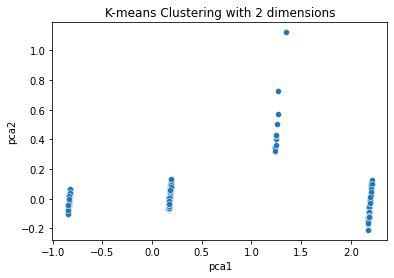

In [14]:
#just to visualize after k-means on X_test

reduced_data = PCA(n_components=2).fit_transform(X_test)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [15]:
'''class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([tf.keras.layers.Dense(64, activation = "relu"),
      tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(16, activation = "relu"),
      tf.keras.layers.Dense(8, activation = "relu")])
    

    self.decoder = tf.keras.Sequential([tf.keras.layers.Dense(16, activation = "relu"),
      tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(64, activation = "relu"),
      tf.keras.layers.Dense(5, activation = "sigmoid")]) 

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)    
    return encoded

'''

'class AutoEncoder(Model):\n  def __init__(self):\n    super(AutoEncoder, self).__init__()\n    self.encoder = tf.keras.Sequential([tf.keras.layers.Dense(64, activation = "relu"),\n      tf.keras.layers.Dense(32, activation = "relu"),\n      tf.keras.layers.Dense(16, activation = "relu"),\n      tf.keras.layers.Dense(8, activation = "relu")])\n    \n\n    self.decoder = tf.keras.Sequential([tf.keras.layers.Dense(16, activation = "relu"),\n      tf.keras.layers.Dense(32, activation = "relu"),\n      tf.keras.layers.Dense(64, activation = "relu"),\n      tf.keras.layers.Dense(5, activation = "sigmoid")]) \n\n  def call(self, x):\n    encoded = self.encoder(x)\n    decoded = self.decoder(encoded)    \n    return encoded\n\n'

In [16]:
#performing AutoEncoder on X_train


# Input information
col_num = X_train.shape[1]
input_dim = Input(shape=(col_num,))

# Encoding information

encoded = Dense(64, activation='sigmoid')(input_dim)
encoded = Dense(32, activation='sigmoid')(encoded)
encoded = Dense(16, activation='sigmoid')(encoded)
encoded = Dense(8, activation='sigmoid')(encoded)
encoded = Dense(4, activation='sigmoid')(encoded)
encoded = Dense(2, activation='sigmoid')(encoded)

# Decoding information

decoded = Dense(4, activation='sigmoid')(encoded)
decoded = Dense(8, activation='sigmoid')(decoded)
decoded = Dense(16, activation='sigmoid')(decoded)
decoded = Dense(32, activation='sigmoid')(decoded)
decoded = Dense(64, activation='sigmoid')(decoded)
decoded = Dense(4, activation='sigmoid')(decoded)

# Autoencoder information (encoder + decoder)

autoencoder = Model(input_dim, decoded)

# Train the autoencoder

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=150, batch_size=100, shuffle=True )




Epoch 1/150
5/5 [==============================] - 11s 4ms/step - loss: 0.1643
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.1174
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0852
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0269
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 11/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 12/150
5/5 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 13/150
5/5 [==============================] - 0s 3ms/s

In [17]:
# Encoder information for feature extraction

encoder = Model(inputs=input_dim, outputs=encoded)
encoded_input = Input(shape=(2,))
encoded_output = encoder.predict(X_test_demo) #using X_test_demo bcz its no of columns is 4 which matches with X_train no of columns


# Show the encoded values
print(encoded_output[:5])


[[0.63386434 0.37061715]
 [0.63387144 0.3706201 ]
 [0.6338641  0.37061223]
 [0.6338653  0.37061328]
 [0.633859   0.37061054]]


In [18]:
#converting encoded_output into DataFrame

after_encoding = pd.DataFrame({'Column1': encoded_output[:, 0], 'Column2': encoded_output[:, 1]})
print(after_encoding)
   

      Column1   Column2
0    0.633864  0.370617
1    0.633871  0.370620
2    0.633864  0.370612
3    0.633865  0.370613
4    0.633859  0.370611
..        ...       ...
479  0.633867  0.370616
480  0.633868  0.370615
481  0.633866  0.370616
482  0.633859  0.370613
483  0.633862  0.370613

[484 rows x 2 columns]


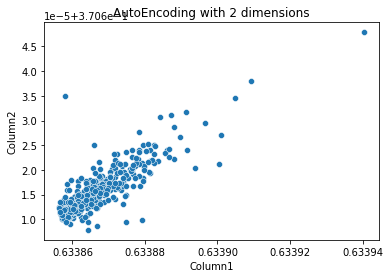

In [19]:
#visualizing after autoencoding

sns.scatterplot(x="Column1", y="Column2", data=after_encoding)
plt.title('AutoEncoding with 2 dimensions')
plt.show()

In [20]:
after_encoding_demo = after_encoding.copy(deep = True)

In [21]:
#now doing k-means on 'after_encoding' dataset

clustering_autoencoder = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
after_encoding['clusters'] = clustering_autoencoder.fit_predict(after_encoding)

In [22]:
after_encoding.head()

,Column1,Column2,clusters
0,0.633864,0.370617,3
1,0.633871,0.370620,3
2,0.633864,0.370612,1
3,0.633865,0.370613,3
4,0.633859,0.370611,1


In [23]:
after_encoding.clusters.value_counts()

1    258
3    161
0     59
2      6
Name: clusters, dtype: int64

In [24]:
#now we will split df into df_train and df_test so that we can add cluster column into new df_train dataset after performing k_means on 'after_encoding'

df_train, df_test = train_test_split(df, test_size =0.5, random_state = 1)

In [25]:
df_test.head()

,ingredients,url,partition,title,id,instructions,Unnamed: 0,calories,protein,carbohydrates,dietary fiber,sugars,fat,saturated fat,cholesterol,vitamin a iu,niacin equivalents,folate,calcium,iron,magnesium,potassium,sodium,calories from fat
773,"[{'text': '1 pound penne pasta'}, {'text': '1/...",http://allrecipes.com/recipe/katies-chicken-an...,train,Katie's Chicken and Broccoli Pasta,5c9e66187d,[{'text': 'Fill a large pot with lightly salte...,788.0,371,3,53,2,27,16,4,0,54,2,44,23,1,12,119,294,148
877,"[{'text': '1 cup water, or more as needed'}, {...",http://allrecipes.com/recipe/ginger-berry-smoo...,val,Ginger Berry Smoothie,5d33382f12,"[{'text': 'Blend water, blueberries, strawberr...",892.0,601,32,62,7,22,25,8,84,62,13,46,136,5,84,835,1580,227
301,[{'text': '1 (750 milliliter) bottle dry white...,http://allrecipes.com/recipe/peach-sangria-wit...,val,Peach Sangria with Raspberries,5a09088d7e,"[{'text': 'Stir white wine, peach schnapps, an...",308.0,209,31,0,0,0,8,3,83,1012,19,8,151,0,39,341,126,73
238,"[{'text': '1 1/4 cups white sugar'}, {'text': ...",http://allrecipes.com/recipe/screw-pine-cake/,train,Screw Pine Cake,59b3af4834,[{'text': 'Preheat oven to 400 degrees F (200 ...,242.0,244,27,2,0,1,11,3,76,114,18,10,21,1,36,345,98,100
255,"[{'text': '2 tablespoons butter, softened'}, {...",http://allrecipes.com/recipe/rotisserie-ham/,test,Rotisserie Ham,59c9ecf780,[{'text': 'Preheat rotisserie oven to 250 degr...,260.0,41,1,1,0,0,3,1,9,142,0,3,38,0,5,59,124,28


In [26]:
print(after_encoding.shape)
print(after_encoding_demo.shape)

(484, 3)
(484, 2)


In [27]:
X_test.head()

,calories,carbohydrates,cholesterol,fat,clusters
773,0.184749,0.109504,0.000000,0.111888,1
877,0.302456,0.128099,0.119149,0.174825,3
301,0.101842,0.000000,0.117730,0.055944,0
238,0.119754,0.004132,0.107801,0.076923,0
255,0.015865,0.002066,0.012766,0.020979,0


In [28]:
#calculating score between k-means and AutoEncoder

In [32]:
#db index before autoencoder

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters, precompute_distances="auto", n_jobs=-1).fit(X_test_demo)
    cluster_labels = cluster.labels_

    db_index = davies_bouldin_score(X_test_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The db_index_score before AutoEncoder :", db_index)
  


For no of clusters = 2  The db_index_score before AutoEncoder : 0.8646731608143786
For no of clusters = 3  The db_index_score before AutoEncoder : 0.9705511869514956
For no of clusters = 4  The db_index_score before AutoEncoder : 1.0524980274706972
For no of clusters = 5  The db_index_score before AutoEncoder : 0.8597169985257415
For no of clusters = 6  The db_index_score before AutoEncoder : 0.9125273961796125
For no of clusters = 7  The db_index_score before AutoEncoder : 0.909975457976269
For no of clusters = 8  The db_index_score before AutoEncoder : 0.91194525116984
For no of clusters = 9  The db_index_score before AutoEncoder : 0.8716031496562657
For no of clusters = 10  The db_index_score before AutoEncoder : 0.8914832389202767


In [33]:
#db index after autoencoder

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters, precompute_distances="auto", n_jobs=-1).fit(after_encoding_demo)
    cluster_labels = cluster.labels_

    db_index = davies_bouldin_score(after_encoding_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The db_index_score after AutoEncoder :", db_index)
  


For no of clusters = 2  The db_index_score after AutoEncoder : 0.6474060188415016
For no of clusters = 3  The db_index_score after AutoEncoder : 0.6895819853072916
For no of clusters = 4  The db_index_score after AutoEncoder : 0.6545028166411392
For no of clusters = 5  The db_index_score after AutoEncoder : 0.5728746731924467
For no of clusters = 6  The db_index_score after AutoEncoder : 0.631515890265726
For no of clusters = 7  The db_index_score after AutoEncoder : 0.6772280919618784
For no of clusters = 8  The db_index_score after AutoEncoder : 0.7314954983748818
For no of clusters = 9  The db_index_score after AutoEncoder : 0.7589193471649749
For no of clusters = 10  The db_index_score after AutoEncoder : 0.7393129801200893


In [34]:
#silhouette index before autoencoder

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(X_test_demo)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(X_test_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score before AutoEncoder :", silhouette_avg)

For no of clusters = 2  The average silhouette_score before AutoEncoder : 0.5394737496887219
For no of clusters = 3  The average silhouette_score before AutoEncoder : 0.45651890555046865
For no of clusters = 4  The average silhouette_score before AutoEncoder : 0.38110419755407854
For no of clusters = 5  The average silhouette_score before AutoEncoder : 0.38364114411607186
For no of clusters = 6  The average silhouette_score before AutoEncoder : 0.3714232966812937
For no of clusters = 7  The average silhouette_score before AutoEncoder : 0.3650248909947813
For no of clusters = 8  The average silhouette_score before AutoEncoder : 0.29243582808451096
For no of clusters = 9  The average silhouette_score before AutoEncoder : 0.28744274187439445
For no of clusters = 10  The average silhouette_score before AutoEncoder : 0.29983300396334805


In [36]:
#silhouette index after autoencoder

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(after_encoding_demo)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(after_encoding_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score after AutoEncoding :", silhouette_avg)

For no of clusters = 2  The average silhouette_score after AutoEncoding : 0.6141077
For no of clusters = 3  The average silhouette_score after AutoEncoding : 0.5456895
For no of clusters = 4  The average silhouette_score after AutoEncoding : 0.5295841
For no of clusters = 5  The average silhouette_score after AutoEncoding : 0.49137878
For no of clusters = 6  The average silhouette_score after AutoEncoding : 0.44478366
For no of clusters = 7  The average silhouette_score after AutoEncoding : 0.38701904
For no of clusters = 8  The average silhouette_score after AutoEncoding : 0.3980403
For no of clusters = 9  The average silhouette_score after AutoEncoding : 0.3854467
For no of clusters = 10  The average silhouette_score after AutoEncoding : 0.3785114


In [37]:
#adding cluster column on df_test 

df_test['clusters'] = after_encoding['clusters'].values   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df_test.head()

,ingredients,url,partition,title,id,instructions,Unnamed: 0,calories,protein,carbohydrates,dietary fiber,sugars,fat,saturated fat,cholesterol,vitamin a iu,niacin equivalents,folate,calcium,iron,magnesium,potassium,sodium,calories from fat,clusters
773,"[{'text': '1 pound penne pasta'}, {'text': '1/...",http://allrecipes.com/recipe/katies-chicken-an...,train,Katie's Chicken and Broccoli Pasta,5c9e66187d,[{'text': 'Fill a large pot with lightly salte...,788.0,371,3,53,2,27,16,4,0,54,2,44,23,1,12,119,294,148,3
877,"[{'text': '1 cup water, or more as needed'}, {...",http://allrecipes.com/recipe/ginger-berry-smoo...,val,Ginger Berry Smoothie,5d33382f12,"[{'text': 'Blend water, blueberries, strawberr...",892.0,601,32,62,7,22,25,8,84,62,13,46,136,5,84,835,1580,227,3
301,[{'text': '1 (750 milliliter) bottle dry white...,http://allrecipes.com/recipe/peach-sangria-wit...,val,Peach Sangria with Raspberries,5a09088d7e,"[{'text': 'Stir white wine, peach schnapps, an...",308.0,209,31,0,0,0,8,3,83,1012,19,8,151,0,39,341,126,73,1
238,"[{'text': '1 1/4 cups white sugar'}, {'text': ...",http://allrecipes.com/recipe/screw-pine-cake/,train,Screw Pine Cake,59b3af4834,[{'text': 'Preheat oven to 400 degrees F (200 ...,242.0,244,27,2,0,1,11,3,76,114,18,10,21,1,36,345,98,100,3
255,"[{'text': '2 tablespoons butter, softened'}, {...",http://allrecipes.com/recipe/rotisserie-ham/,test,Rotisserie Ham,59c9ecf780,[{'text': 'Preheat rotisserie oven to 250 degr...,260.0,41,1,1,0,0,3,1,9,142,0,3,38,0,5,59,124,28,1


In [53]:
#total calorie count from each cluster
calorie_sum_of_each_cluster = []

for i in range(4):
    sum = 0
    c = df_test[df_test['clusters'] == i]
    for j in c.index:
      sum = sum + c.loc[j].calories
    calorie_sum_of_each_cluster.append(sum)  
    
      

In [54]:
calorie_sum_of_each_cluster 

[39331, 46857, 7298, 66142]

In [55]:
#total sum of calories of all clusters

total_sum = 0
for i in calorie_sum_of_each_cluster:
    total_sum = total_sum + i
print(total_sum)

159628


In [56]:
#suppose BMR of user is 3000
BMR = 3000

In [57]:
#calorie count chosen from each cluster is divided into ratios:
#suppose BMR is 200
#if cluster 1 has 100 calorie, cluster 2 has 300 calorie, 3 has 200 and 4 has 400 calorie then
# from cluster 1 we would select (100/1000)* BMR = 20calorie.. so we will choose 20 calorie food randomly from cluster1.. similarly for other clusters

each_cluster_calories_after_ratio = []
for i in range(len(calorie_sum_of_each_cluster)):
    ratio = (calorie_sum_of_each_cluster[i]/(total_sum))* BMR
    each_cluster_calories_after_ratio.append(ratio)
    

In [58]:
each_cluster_calories_after_ratio    #so we will select total 739 calorie foods randomly from cluster 0, 880 from cluster 1 and so on..

[739.1748314831984, 880.6161826246021, 137.15638860350313, 1243.0525972886962]

In [59]:
#putting index values from each cluster into list

df_index_list = []
for i in range(4):
    df_index_list.append(df_test[df_test['clusters'] == i].index.tolist())
    
    

In [60]:
%%time

import random

top_5 = []    #list to append all index values 
for x in range(5):   # 5 coz we want to recommend 4 dishes, depends on how many we want to recommend
    cal_list = []
    for i in range(len(df_index_list)):
        observe = 0
        sum = 0
        count = 0
        while(True):
            x = random.choice(df_index_list[i])   #choosing randomly any index from df_index_list
            j = df_test.loc[x]   #getting the series based on random value x

            if j.calories > each_cluster_calories_after_ratio[i]:  # if calorie value after choosing random index > how much we need then continue
                observe = observe + 1
                if observe <= 5:
                    continue
                else:
                    break
            count = count + 1   # if cal value less than required then increment +1 to count
            if sum + j.calories <= each_cluster_calories_after_ratio[i]:    # if sum value + cal value less than required value then again append j.calories
                sum = sum + j.calories
                cal_list.append(x) #apending the index 

            elif ((sum + j.calories - each_cluster_calories_after_ratio[i]) <= 300):   #we will stop when sum exceedes 300
                sum = sum + j.calories
                cal_list.append(x)
                break

            elif count > len(df_index_list[i]):    #to stop infinite loop when count > len of index list we will break from loop
                break
    top_5.append(cal_list) 

CPU times: user 39.6 ms, sys: 0 ns, total: 39.6 ms
Wall time: 39.8 ms


In [61]:
top_5    #list of index values from where we will collect the titles, ingredients etc.

[[757, 538, 192, 915, 872, 963, 918, 433, 725, 938, 267],
 [95, 194, 758, 502, 639, 487, 125, 593, 228, 553, 76, 479],
 [594, 768, 940, 110, 430, 494, 361, 101, 259, 371, 5],
 [552, 949, 785, 885, 509, 374, 74, 267, 631, 31],
 [363, 759, 301, 823, 34, 258, 294, 439, 531, 283, 200]]

In [63]:
title = []   #to get the title of foods

ingredients = []   #to get ingredients of foods
for i in range(len(top_5)):
    title_0 = []
    for k in top_5[i]:
        j = df_test.loc[k]
        title_0.append(j.title)
        ingredients.append(j.ingredients)
    title.append(title_0)

In [64]:
title[0]

['Strawberry Kiwi Milkshakes',
 'Pecan Tarts',
 'Green Monster Smoothie',
 'Savory Roll Ups',
 "Eileen's Meatloaf",
 'Red Velvet Brownies with Cream Cheese Frosting',
 'My Favorite Cookie',
 'Spinach Mushroom and Ricotta Fettuccine',
 'Peri Peri Chicken Livers',
 'Malabari Chicken Stew',
 'Baked Pork Chops II']

In [65]:
print("the person can try: ")
print("---------------------")
for i in title[0]:
    print(i)
  
print("\n")
print("recommendations are :")
print("---------------------")
for i in range(1,len(title)):
    print(title[i])

the person can try: 
---------------------
Strawberry Kiwi Milkshakes
Pecan Tarts
Green Monster Smoothie
Savory Roll Ups
Eileen's Meatloaf
Red Velvet Brownies with Cream Cheese Frosting
My Favorite Cookie
Spinach Mushroom and Ricotta Fettuccine
Peri Peri Chicken Livers
Malabari Chicken Stew
Baked Pork Chops II


recommendations are :
---------------------
['Chocolate Mint Cookies II', 'Prosciutto-Wrapped Chicken Breasts with Herbed Goat Cheese', 'Candied Nuts', 'Sweet Italian Green Beans', 'Apple Martini', 'Baked Apple Turnovers', 'Spicy Chunks of Stewed Beef Soup', 'Fast and Easy Zucchini Soup', 'Monster Cookies I', 'Baked Cinnamon Apple French Toast', 'Ensalada Roja con Pollo (Red Salad with Chicken)', 'Traditional Swedish Pepparkakor']
["Suzy's Green Tomato Relish", 'Fresh Shrimp Boil', "Burn Ban S'mores", 'Really Fast Zucchini Soup', 'Cranberry Salad IV', "Dad's Down Home Cornbread and Jalapeno Meatloaf", 'Balsamic Butternut Squash with Kale', 'Shrimp in Lobster Sauce', 'Chocolate 